In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from __future__ import unicode_literals
from hazm import *
from hazm import stopwords_list
import random
import string

In [3]:
punctuation = '''! ( ) - [ ] { } ; : ' " \ , < >؟ ؛ « » . / ? @ # $ % ^ & * _ ~ ٬ ٫ ٪ × ، +'''.split()
stop_words = stopwords_list() + punctuation

def preprocess(sentence):
    
    normalizer = Normalizer()
    tokenize_sentence = word_tokenize ( normalizer.normalize(sentence))
    final_sentence = [word for word in tokenize_sentence if not word in stop_words]
    return final_sentence


In [4]:
def jaccard_similarity(sentences):
  
    x = sentences[0]
    y = sentences[1]

    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return round(intersection_cardinality/float(union_cardinality), 2)

In [5]:
exam_df = pd.read_csv('exam.csv')
exam_df = exam_df.set_index('student')
student = exam_df.index
exam_df 

,1,2,3,4,5,6,7
student,,,,,,,
آستیاژ مهتا زاده,حل مسائل تویmap-reduce یعنی پیدا کردن زوج ها...,متد in-map reducer در اصل ترکیبی از 3 تابع ma...,تابع ()combine در سمت map یک state رو نگه می د...,تابع ()combine به نوعی وظیفه ی reduce را سمت m...,با 2 الیه m-r انجام می دهد: لایه اول :مثلث باز...,دو مدل عملگر ( operation ) در spark داریم : a...,"S =n \nB = s\n\nB [ hi (s) ] =1 for (i = 1 ,....."
مژده افسون,خوشه بندی اسناد را با روش k means میتوان به طو...,NaN,NaN,combine مینی ردیوسر هایی هستند که در حافظه بعد...,با دو لایه مپ ردیوس میتوانیم مثلث های یک گراف ...,عملگر ها در اسپارک دو نوع اند :\n\nnarrow tra...,احتمال false positive در فیلتر بلوم با آرایه ا...
آرتمیس مانلیی,N به تعداد آبجکت ها اشار داره و K به تعداد خوش...,محیط پردازشی برای مپ ردیوس یک آبجکت کلاس مپ در...,یکسری ماشینreducerداریم که تابعreduce()را جرا ...,تابعcombine()به نوعی وظیفه یreduceرا سمتmapاجر...,Attachments: WhatsApp Image 2022-01-18 at 14.4...,دو مدلoperationدر اسپارک هست:actionوtransform...,پیوست می باشد.\n\nAttachments: WhatsApp Image ...
نیوشا نازیلا خوانی,تابع map هر sample رو به نزدیکترین مرکزش اختصا...,یعنی state دار بودن اگه از mapper و object ...,باید کلید ها hash شوند و با استفاده از تابع p...,به combine وظیفه مشابه با reducer دارد ولی در ...,در لایه اول مثلث های باز و در لایه دوم مثلث ها...,transformation و action\n\nاولی lazy است به د...,b[hi(s)]=1\n\nو در stream برابر با B[hi(X)] =...
آرمینا خجسته صفت,الگوریتم K-Means که یک روش خوشه‌بندی بسیار محب...,برای اینکه کل داده های ما پردازش شود مجبوریم د...,در bigdata زمانی که تعداد رکوردها خیلی زیاد می...,یک ماشین map و یک ماشین Reduce دریم . به تایه ...,3 تا مثلث در M-r1 در M-r2 ه 3 تا تشخیص می د...,transformation= دستوراتی که تاجایی بتواند انجا...,اولین قدم این است که حافظه را به صورت bit در ن...
مشکان‌دخت دوکا خوانی,Attachments: Soal2(1) 18-Jan-2022 15-17-58.pdf...,ما با تابع in mapper reducer مشکل stateless ...,با اومدن هر خط یا تاپل متغییرش به روز رسانی و...,ورودی combin مثله ورودی reducer و خروجی اش م...,فایل جواب رو نوشتم.\n\nAttachments: soal6(1) 1...,Attachments: Soal7 18-Jan-2022 14-21-58.pdf (3...,به صورت pdf نمیرسید عکس دادم ببخشید\n\nAttachm...
شهناز مهروا پور,راه حل MapReduce برای خوشه بندی K-means اسناد ...,این قاعده stateless بودن را نقض میکند و برای ا...,میتوانیم از combine استفاده کنیم برای اینکه st...,ورودی شامل یکی از این 3 پارامتر record ، فایل...,هر یال را به صورت زوج مرتب میگیریم وقتی یال b-...,دو مدل operation در اسپارک وجود دارد : action ...,با توجه به فرمولی که در عکس بارگذاری شده است\n...
زامیاد کامبیز خوانی,در این روش براساس میانگین خوشه بندی می شود. نم...,"در الگوی پاریس کلید a , b تعریف و به ازای هر ز...",می توانیم بسته به الگوریتم کتار از هارد و رم ک...,در مپ داده ها را به صورت یک زوج کلید/مقدار است...,لایه 1: مثلث باز و لایه 2: بسته\n\nدر لایه 2 ب...,transformation و action\n\nترنسفورمیشن مثل فیل...,اگر توابع هش بینهایت باشد درنهایت همه هدف ها ...
سام آذرمه زاده,centroid k= ابتدا چندین نقطه(مرکز) تصادفی برای...,in-map reduced یا همان تابع combine یا همان mi...,اگر در reducer خطایی رخ بدهد میتوانیم آن را هن...,در signature تابع combine باید مدنظر داشته باش...,اگر گراف حجیم باشد و تعداد یال ها زیاد باشد خو...,در اسپارک دو نوع عملگر داریم:\n1- Transformati...,زمانی از bloom filter استفاده میشود که تعداد و...


In [6]:
number_of_students = len(exam_df)
number_of_question = int(len(exam_df.columns))
questions = exam_df.columns
students = exam_df.index

In [7]:
#جایگزاری یک رشته رندوم به جای جواب های خالی
exam_df_1 = exam_df.copy()

for i in questions:
    for j in students:
        
        if(type(exam_df_1[i].loc[j]) != str):
            exam_df_1[i].loc[j] = ''.join(random.choices(string.ascii_uppercase, k=10))
        
exam_df_1

,1,2,3,4,5,6,7
student,,,,,,,
آستیاژ مهتا زاده,حل مسائل تویmap-reduce یعنی پیدا کردن زوج ها...,متد in-map reducer در اصل ترکیبی از 3 تابع ma...,تابع ()combine در سمت map یک state رو نگه می د...,تابع ()combine به نوعی وظیفه ی reduce را سمت m...,با 2 الیه m-r انجام می دهد: لایه اول :مثلث باز...,دو مدل عملگر ( operation ) در spark داریم : a...,"S =n \nB = s\n\nB [ hi (s) ] =1 for (i = 1 ,....."
مژده افسون,خوشه بندی اسناد را با روش k means میتوان به طو...,ESWOJAWHCY,FOWDTNFJUV,combine مینی ردیوسر هایی هستند که در حافظه بعد...,با دو لایه مپ ردیوس میتوانیم مثلث های یک گراف ...,عملگر ها در اسپارک دو نوع اند :\n\nnarrow tra...,احتمال false positive در فیلتر بلوم با آرایه ا...
آرتمیس مانلیی,N به تعداد آبجکت ها اشار داره و K به تعداد خوش...,محیط پردازشی برای مپ ردیوس یک آبجکت کلاس مپ در...,یکسری ماشینreducerداریم که تابعreduce()را جرا ...,تابعcombine()به نوعی وظیفه یreduceرا سمتmapاجر...,Attachments: WhatsApp Image 2022-01-18 at 14.4...,دو مدلoperationدر اسپارک هست:actionوtransform...,پیوست می باشد.\n\nAttachments: WhatsApp Image ...
نیوشا نازیلا خوانی,تابع map هر sample رو به نزدیکترین مرکزش اختصا...,یعنی state دار بودن اگه از mapper و object ...,باید کلید ها hash شوند و با استفاده از تابع p...,به combine وظیفه مشابه با reducer دارد ولی در ...,در لایه اول مثلث های باز و در لایه دوم مثلث ها...,transformation و action\n\nاولی lazy است به د...,b[hi(s)]=1\n\nو در stream برابر با B[hi(X)] =...
آرمینا خجسته صفت,الگوریتم K-Means که یک روش خوشه‌بندی بسیار محب...,برای اینکه کل داده های ما پردازش شود مجبوریم د...,در bigdata زمانی که تعداد رکوردها خیلی زیاد می...,یک ماشین map و یک ماشین Reduce دریم . به تایه ...,3 تا مثلث در M-r1 در M-r2 ه 3 تا تشخیص می د...,transformation= دستوراتی که تاجایی بتواند انجا...,اولین قدم این است که حافظه را به صورت bit در ن...
مشکان‌دخت دوکا خوانی,Attachments: Soal2(1) 18-Jan-2022 15-17-58.pdf...,ما با تابع in mapper reducer مشکل stateless ...,با اومدن هر خط یا تاپل متغییرش به روز رسانی و...,ورودی combin مثله ورودی reducer و خروجی اش م...,فایل جواب رو نوشتم.\n\nAttachments: soal6(1) 1...,Attachments: Soal7 18-Jan-2022 14-21-58.pdf (3...,به صورت pdf نمیرسید عکس دادم ببخشید\n\nAttachm...
شهناز مهروا پور,راه حل MapReduce برای خوشه بندی K-means اسناد ...,این قاعده stateless بودن را نقض میکند و برای ا...,میتوانیم از combine استفاده کنیم برای اینکه st...,ورودی شامل یکی از این 3 پارامتر record ، فایل...,هر یال را به صورت زوج مرتب میگیریم وقتی یال b-...,دو مدل operation در اسپارک وجود دارد : action ...,با توجه به فرمولی که در عکس بارگذاری شده است\n...
زامیاد کامبیز خوانی,در این روش براساس میانگین خوشه بندی می شود. نم...,"در الگوی پاریس کلید a , b تعریف و به ازای هر ز...",می توانیم بسته به الگوریتم کتار از هارد و رم ک...,در مپ داده ها را به صورت یک زوج کلید/مقدار است...,لایه 1: مثلث باز و لایه 2: بسته\n\nدر لایه 2 ب...,transformation و action\n\nترنسفورمیشن مثل فیل...,اگر توابع هش بینهایت باشد درنهایت همه هدف ها ...
سام آذرمه زاده,centroid k= ابتدا چندین نقطه(مرکز) تصادفی برای...,in-map reduced یا همان تابع combine یا همان mi...,اگر در reducer خطایی رخ بدهد میتوانیم آن را هن...,در signature تابع combine باید مدنظر داشته باش...,اگر گراف حجیم باشد و تعداد یال ها زیاد باشد خو...,در اسپارک دو نوع عملگر داریم:\n1- Transformati...,زمانی از bloom filter استفاده میشود که تعداد و...


In [8]:
exam_df_2 = exam_df_1.copy()
for i in questions:
    exam_df_2[i] = exam_df_2[i].apply(lambda x: preprocess(x))

exam_df_2

,1,2,3,4,5,6,7
student,,,,,,,
آستیاژ مهتا زاده,"[مسائل, تویmap-reduce, زوج‌ها, value‌ها, map, ...","[متد, in-map, reducer, اصل, ترکیبی, ۳, تابع, m...","[تابع, combine, map, state, نگه, می‌دارد, ورود...","[تابع, combine, وظیفه‌ی, reduce, map, میکند, ت...","[۲, الیه, m-r, انجام, لایه, مثلث, باز‌ها, لایه...","[مدل, عملگر, operation, spark, action, transfo...","[S, =n, B, =, s, B, hi, s, =۱, for, i, =, ۱, …..."
مژده افسون,"[خوشه, اسناد, k, means, میتوان, بهینه, نوشتن, ...",[ESWOJAWHCY],[FOWDTNFJUV],"[combine, مینی, ردیوسر, حافظه, مرحله‌ی, map, م...","[لایه, مپ, ردیوس, میتوانیم, مثلث‌های, گراف, تک...","[عملگر‌ها, اسپارک, narrow, transformation, map...","[احتمال, false, positive, فیلتر, بلوم, آرایه‌ا..."
آرتمیس مانلیی,"[N, آبجکت‌ها, اشار, داره, K, خوشه, ساخته, تابع...","[محیط, پردازشی, مپ, ردیوس, آبجکت, کلاس, مپ, در...","[یکسری, ماشینreducerداریم, تابعreduce, جرا, یک...","[تابعcombine, وظیفه, یreduceرا, سمتmapاجرا, می...","[Attachments, WhatsApp, Image, ۲۰۲۲, -۰۱-۱۸, a...","[مدلoperationدر, اسپارک, هست, actionوtransform...","[پیوست, Attachments, WhatsApp, Image, ۲۰۲۲, -۰..."
نیوشا نازیلا خوانی,"[تابع, map, sample, نزدیکترین, مرکزش, اختصاص, ...","[state, اگه, mapper, object, ساخته_می‌شود, red...","[کلید‌ها, hash, استفاده, تابع, partiton, داده‌...","[combine, وظیفه, مشابه, reducer, map, خروجی, m...","[لایه, مثلث‌های, لایه, مثلث‌های, بسته, بررسی, ...","[transformation, action, اولی, lazy, دلیل, نود...","[b, hi, s, =۱, stream, B, hi, X, =, ۱, وبرای, ..."
آرمینا خجسته صفت,"[الگوریتم, K-Means, خوشه‌بندی, محبوب, الگوریتم...","[داده‌های, پردازش, مجبوریم, هایمان, خط, خط, بخ...","[bigdata, زمانی, رکوردها, ram, هارد, CPU, شبکه...","[ماشین, map, ماشین, Reduce, دریم, تایه, combin...","[۳, مثلث, M-r۱, M-r۲, ه, ۳, تشخیص, مثلث, تکرار...","[transformation=, دستوراتی, تاجایی, بتواند, ان...","[قدم, حافظه, صورت, bit, بگیرم, مقدار, اولیه, ب..."
مشکان‌دخت دوکا خوانی,"[Attachments, Soal۲, ۱, ۱۸-Jan-, ۲۰۲۲, ۱۵-۱۷-۵...","[تابع, in, mapper, reducer, مشکل, stateless, m...","[اومدن, خط, تاپل, متغییرش, روز, رسانی, اپدیت, ...","[ورودی, combin, مثله, ورودی, reducer, خروجی, م...","[فایل, جواب, نوشتم, Attachments, soal۶, ۱, ۱۸-...","[Attachments, Soal۷, ۱۸-Jan-, ۲۰۲۲, ۱۴-۲۱-۵۸, ...","[صورت, pdf, نمیرسید, عکس, دادم, ببخشید, Attach..."
شهناز مهروا پور,"[MapReduce, خوشه, K-means, اسناد, استفاده, ite...","[قاعده, stateless, نقض, میکند, بخواهد, اطلاعات...","[میتوانیم, combine, استفاده, state‌ها, ذخیره, ...","[ورودی, ۳, پارامتر, record, فایل, خط, متنی, اط...","[یال, صورت, زوج, مرتب, میگیریم, یال, b-a, دریا...","[مدل, operation, اسپارک, action, transformatio...","[توجه, فرمولی, عکس, بارگذاری, سری, کاراکتر, n,..."
زامیاد کامبیز خوانی,"[میانگین, خوشه, نمی‌توان, کمباینر, کپی, ازای, ...","[الگوی, پاریس, کلید, a, b, تعریف, ازای, زوج, ا...","[می‌توانیم, بسته, الگوریتم, کتار, هارد, رم, کم...","[مپ, داده‌ها, صورت, زوج, کلید/مقدار, استخراج, ...","[لایه, ۱, مثلث, لایه, ۲, بسته, لایه, ۲, بررسی,...","[transformation, action, ترنسفورمیشن, فیلتر, د...","[توابع, هش, بینهایت, درنهایت, هدف‌ها, زده, بیت..."
سام آذرمه زاده,"[centroid, k=, چندین, نقطه, مرکز, تصادفی, مقدا...","[in-map, reduced, تابع, combine, mini, reducer...","[reducer, خطایی, رخ, بدهد, میتوانیم, هندل, بدی...","[signature, تابع, combine, مدنظر, داشته_باشیم,...","[گراف, حجیم, یال‌ها, Attachments, WhatsApp, Im...","[اسپارک, عملگر, ۱-, Transformation, عملگر, صور...","[زمانی, bloom, filter, استفاده, میشود, حجم, دا..."


In [9]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

similarity_array = np.zeros((number_of_question,number_of_students,number_of_students))

right = []
left = []
weight = [] 

for k in questions:
    
    answers = exam_df_2[k]
    
    right.append([])
    left.append([])
    weight.append([])

    x = 1
    for i in range(len(answers) - 1):
        for j in range((len(answers)  - x)):

            right[int(k)-1].append(get_display(reshape(student[i])))
            left[int(k)-1].append(get_display(reshape(student[j+x])))
            
            sentences = [answers[i], answers[j+x]]
            similarity_array[int(k)-1,i, j+x] = jaccard_similarity(sentences)
            weight[int(k)-1].append(jaccard_similarity(sentences))

        x = x + 1

In [10]:
graph_dic_list = []
graph_df_list = []
similarity_df_list = []

for i in range(number_of_question):
    graph_dic_list.append({'right' : right[i] , 'left' : left[i] , 'weight': weight[i]})
    graph_df_list.append(pd.DataFrame(data=graph_dic_list[i], dtype=None, copy=None))
    similarity_array[i][len(student)-1][0] = 1
    similarity_df_list.append(pd.DataFrame(data=np.transpose(similarity_array[i], axes=None), index=student, columns=student, dtype=None, copy=None))

In [17]:
# import arabic_reshaper
# from bidi.algorithm import get_display

# mask = np.zeros_like(similarity_df_list[0])
# mask[np.triu_indices_from(mask)] = True
# with sns.axes_style("white"):
#     f, ax = plt.subplots(figsize=(9, 9))
#     ax = sns.heatmap(similarity_df_list[0].values, mask=mask, vmax=1, square=True)
    


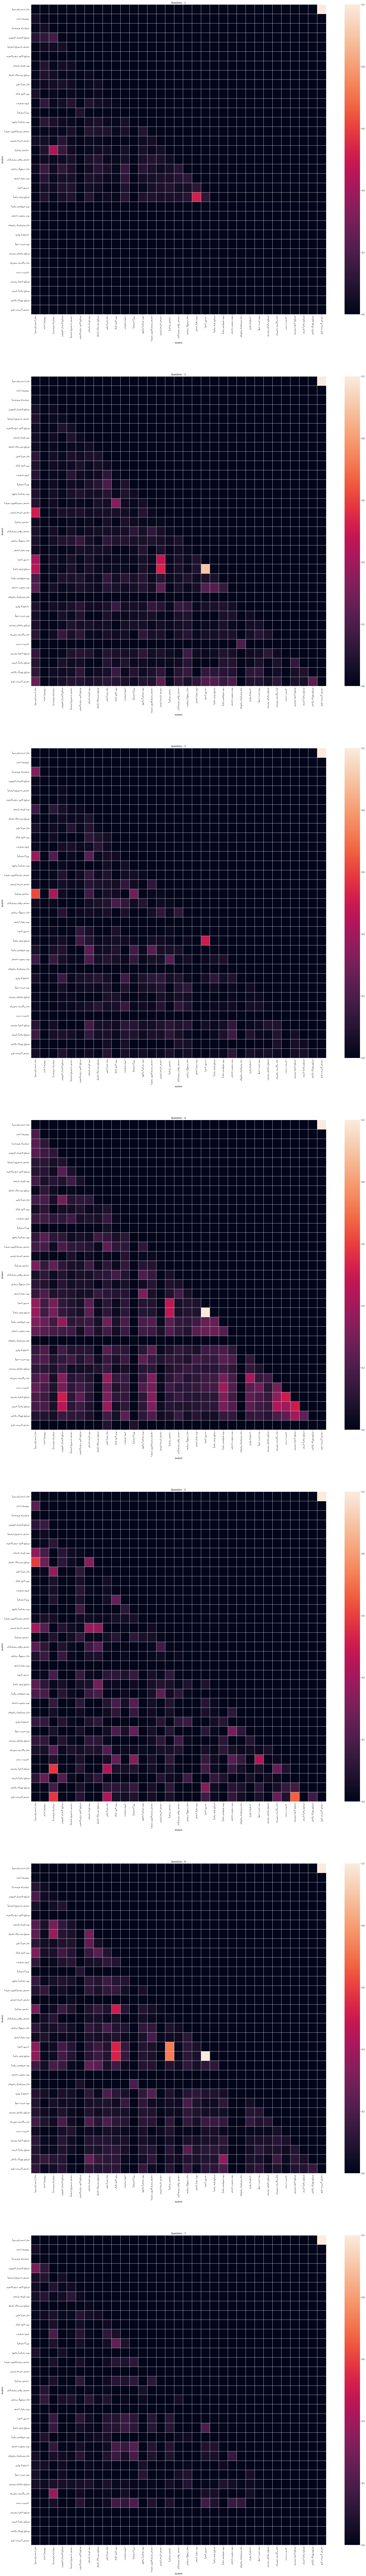

In [16]:
fig, ax = plt.subplots(number_of_question, 1, figsize=((8*(number_of_students/8)),100*(number_of_question/3)))

for i in range(number_of_question):
    ax[i].set_title('Question - ' + str(i+1))
    sns.heatmap(similarity_df_list[i], ax=ax[i], linewidths=.5)
    
plt.savefig("sns-heatmap.pdf")
plt.show() 

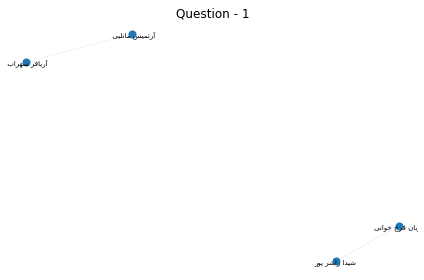

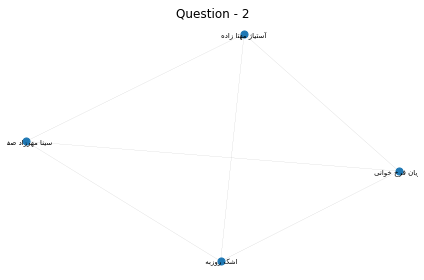

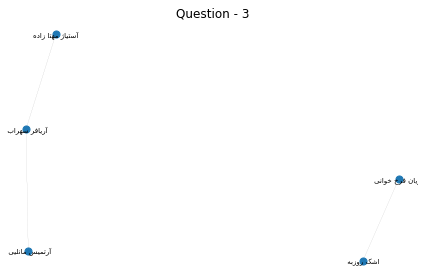

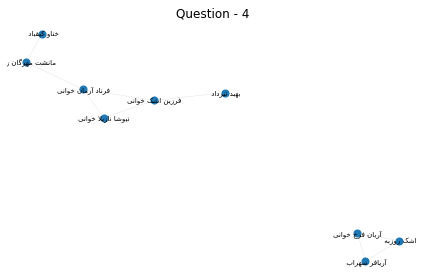

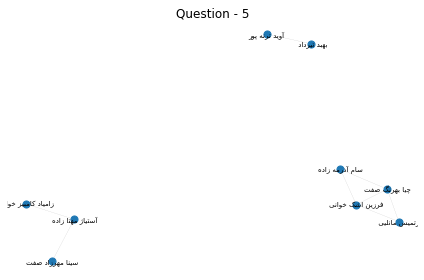

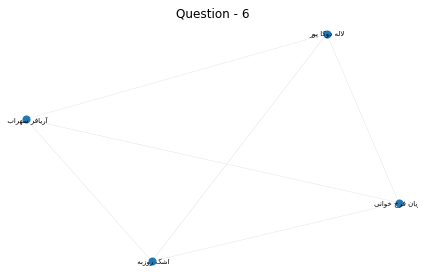

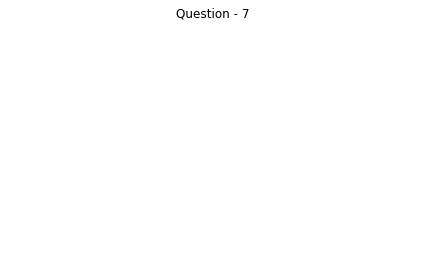

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

for j in range(number_of_question):
    G = nx.Graph()

    for i in range(len(graph_df_list[j])):
        if(graph_df_list[j]['weight'].loc[i] > 0.4):
            G.add_edge(graph_df_list[j]['right'].loc[i], graph_df_list[j]['left'].loc[i], weight=float(graph_df_list[j]['weight'].loc[i]))


    mean_similarity = round(graph_df_list[j]['weight'].mean(), 2)

    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > mean_similarity]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= mean_similarity]


    pos = nx.spring_layout(G, seed=1)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=50)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=0.05)
#     nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.9, edge_color="b",style="dashed")

    # labels
    nx.draw_networkx_labels(G, pos, font_size=7)

    ax = plt.gca()
    ax.margins(0.0005)
    ax.set_title('Question - ' + str(j+1))

    plt.axis("off")
    plt.tight_layout()
    plt.savefig("xn-graph"+str(j+1)+".pdf")
    plt.show()